### Vision Transformers for Human Emotions Classification

Dataset : https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes 

Tutorial : https://colab.research.google.com/drive/18u1KDx-9683iZNPxSDZ6dOv9319ZuEC_#scrollTo=o748nhzfcc_f

In [1]:
!pip install tensorflow==2.13.0
!pip install transformers==4.33.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 30.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2
ERROR: Operation cancelled by user


In [1]:
from google.colab import drive
from google.colab import files
import tensorflow as tf
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization
from tensorflow.keras.layers import Normalization, Dense, InputLayer, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError

from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC, binary_accuracy
from tensorflow.keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy
from tensorflow.keras.layers import Embedding, Input, Layer, GlobalAveragePooling2D, Activation, Add, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import cv2
import datetime
import sklearn
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns

from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.layers import Permute, RandomFlip, RandomRotation, Resizing, Rescaling, RandomContrast


2.17.1


In [2]:
# Download dataset from kaggle
!pip install -q kaggle

In [3]:
files.upload()
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory


In [4]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

Dataset URL: https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes
License(s): unknown
 99% 305M/309M [00:04<00:00, 78.9MB/s]
100% 309M/309M [00:04<00:00, 77.0MB/s]


In [5]:
!unzip "/content/human-emotions-datasethes.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/EmotionsDataset/data/nothing/720.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/721.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/722.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/723.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/724.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/725.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/726.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/727.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/728.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/729.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/73.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/730.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/731.jpg  
  inflating: /content/dataset/EmotionsDataset/data/no

In [6]:
train_directory = "/content/dataset/Emotions Dataset/Emotions Dataset/train"
val_directory = "/content/dataset/Emotions Dataset/Emotions Dataset/test"

In [7]:
CLASS_NAMES = ['angry', 'happy', 'sad']
CONFIGARATION = {
    'BATCH_SIZE': 32,
    'IM_SIZE': 256,
    "LEARNING_RATE": 0.001,
    "N_EPOCHS": 20,
    "BATCH_SIZE": 128,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 3,
    "PATCH_SIZE": 16,
    "MODEL_NAME": "vit" #'hf_model'
}

In [8]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGARATION['BATCH_SIZE'],
    image_size=(CONFIGARATION['IM_SIZE'], CONFIGARATION['IM_SIZE']),
    shuffle=True,
    seed=123
)

Found 6799 files belonging to 3 classes.


In [9]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGARATION['BATCH_SIZE'],
    image_size=(CONFIGARATION['IM_SIZE'], CONFIGARATION['IM_SIZE']),
    shuffle=True,
    seed=123
)

Found 2278 files belonging to 3 classes.


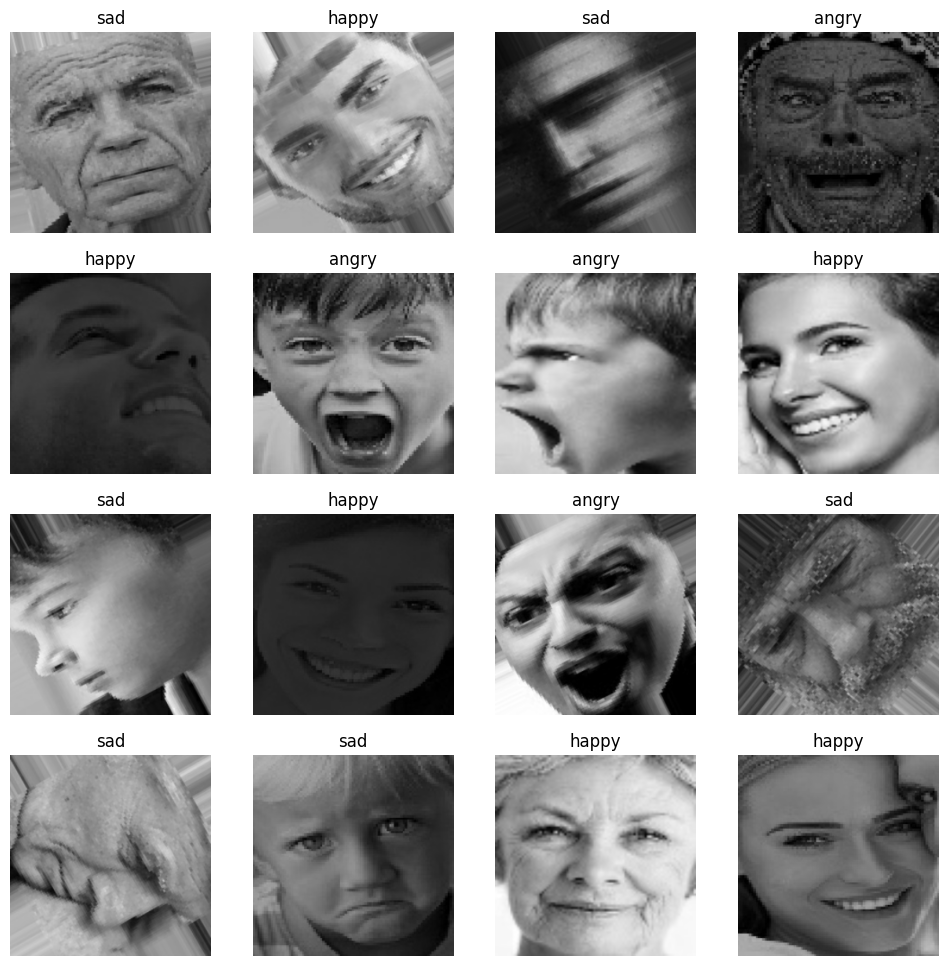

In [10]:
plt.figure(figsize = (12,12))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i]/255.)
    plt.title(CLASS_NAMES[int(tf.argmax(labels[i], axis=0).numpy())])
    plt.axis('off')

In [11]:
training_dataset = (
    train_dataset
    #.map(augment_layer, num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
    )
validation_dataset = (
    val_dataset
    .prefetch(tf.data.AUTOTUNE)
    )

### Patch Encoder

In [12]:
test_image = cv2.imread('/content/dataset/Emotions Dataset/Emotions Dataset/test/sad/101783.jpg_rotation_1.jpg')
print(test_image.shape)
test_image = cv2.resize(test_image, (CONFIGARATION['IM_SIZE'], CONFIGARATION['IM_SIZE']))
print(test_image.shape)

(224, 224, 3)
(256, 256, 3)


In [13]:
patches = tf.image.extract_patches(images = tf.expand_dims(test_image, axis = 0),
                                   sizes=[1,CONFIGARATION['PATCH_SIZE'],CONFIGARATION['PATCH_SIZE'],1],
                                   strides=[1,CONFIGARATION['PATCH_SIZE'],CONFIGARATION['PATCH_SIZE'],1],
                                   rates=[1,1,1,1],
                                   padding='VALID')
print(patches.shape)

(1, 16, 16, 768)


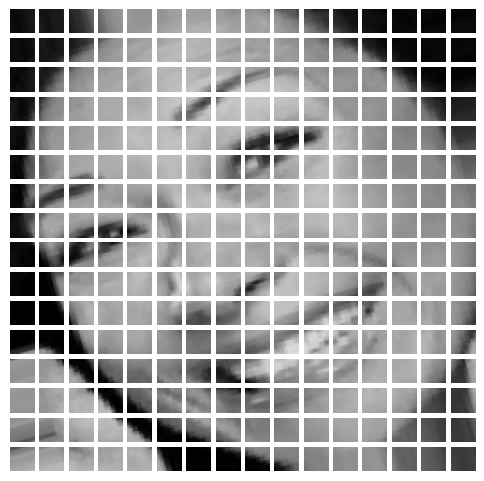

In [14]:
plt.figure(figsize = (6,6))
k = 0
for i in range(16):
  for j in range(16):
    ax = plt.subplot(16,16,k+1)
    plt.imshow(tf.reshape(patches[0,i,j,:], (16,16,3)))
    plt.axis('off')
    k += 1

In [15]:
patches = tf.reshape(patches, (patches.shape[0], -1, patches.shape[-1]))
print(patches.shape)

(1, 256, 768)


In [16]:
class PatchEncoder(Layer):
  def __init__(self, N_PATCHES, HIDDEN_SIZE):
    super(PatchEncoder, self).__init__(name = 'patch_encoder')

    self.linear_projection = Dense(HIDDEN_SIZE)
    self.position_embedding = Embedding(N_PATCHES, HIDDEN_SIZE)
    self.N_PATCHES = N_PATCHES

  def call(self, x):
    patches = tf.image.extract_patches(images = x,
                                       sizes=[1,CONFIGARATION['PATCH_SIZE'],CONFIGARATION['PATCH_SIZE'],1],
                                       strides=[1,CONFIGARATION['PATCH_SIZE'],CONFIGARATION['PATCH_SIZE'],1],
                                       rates=[1,1,1,1],
                                       padding='VALID')
    patches = tf.reshape(patches, (tf.shape(patches)[0], -1, patches.shape[-1]))
    embedding_input = tf.range(start = 0, limit = self.N_PATCHES, delta = 1)
    output = self.linear_projection(patches) + self.position_embedding(embedding_input)
    return output

In [17]:
patch_enc = PatchEncoder(N_PATCHES = 256, HIDDEN_SIZE = 768)

In [18]:
class TransformerEncoder(Layer):
  def __init__(self, N_HEADS, HIDDEN_SIZE):
    super(TransformerEncoder, self).__init__(name = 'transformer_encoder')

    self.layer_norm_1 = LayerNormalization()
    self.layer_norm_2 = LayerNormalization()
    self.multi_head_att = MultiHeadAttention(N_HEADS, HIDDEN_SIZE)
    self.dense_1 = Dense(HIDDEN_SIZE, activation = tf.nn.gelu)
    self.dense_2 = Dense(HIDDEN_SIZE, activation = tf.nn.gelu)

  def call(self, input):
    x = self.layer_norm_1(input)
    x = self.multi_head_att(x,x)
    x = Add()([x, input])
    x_1 = self.layer_norm_2(x)
    x_1 = self.dense_1(x_1)
    x_1 = self.dense_2(x_1)
    output = Add()([x_1, x])
    return output

In [19]:
class ViT(Model):
  def __init__(self, N_HEADS, HIDDEN_SIZE, N_PATCHES, N_LAYERS, N_DENSE_UNITS):
    super(ViT, self).__init__(name = 'vision_transformer')

    self.patch_encoder = PatchEncoder(N_PATCHES, HIDDEN_SIZE)
    self.trans_encoder = [TransformerEncoder(N_HEADS, HIDDEN_SIZE) for _ in range(N_LAYERS)]
    self.dense_1 = Dense(N_DENSE_UNITS, tf.nn.gelu)
    self.dense_2 = Dense(N_DENSE_UNITS, tf.nn.gelu)
    self.dense_3 = Dense(CONFIGARATION['NUM_CLASSES'], activation = 'softmax')

  def call(self, input):
    x = self.patch_encoder(input)
    for layer in self.trans_encoder:
      x = layer(x)
    x = Flatten()(x)
    x = self.dense_1(x)
    x = self.dense_2(x)
    output = self.dense_3(x)
    return output

In [20]:
vit = ViT(N_HEADS = 4, HIDDEN_SIZE = 768, N_PATCHES = 256, N_LAYERS = 2, N_DENSE_UNITS = 128)
#vit(tf.zeros((1,256,256,3)))
#vit.summary()

### HuggingFace ViT

In [7]:
from transformers import TFViTModel, ViTConfig, ViTModel
config = ViTConfig()
model = ViTModel(config)
print(model.config)

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.33.3"
}



In [8]:
resize_rescale_layers = tf.keras.Sequential([
    Resizing(224, 224),
    Rescaling(1.0/255),
    Permute((3,1,2))
])

In [9]:
from transformers import TFViTModel

base_model = TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
base_model.trainable = False
# inputs
inputs = tf.keras.layers.Input(shape=(256,256,3), dtype='float32')
pixel_values = resize_rescale_layers(inputs)
# model layer
x = base_model.vit(pixel_values)[0][:, 0, :]
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
classifier = Dense(CONFIGARATION["NUM_CLASSES"], activation='softmax', name='outputs')(x)

# model
hf_model = tf.keras.Model(inputs=inputs, outputs=classifier)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
All PyTorch model weights were used when initializing TFViTModel.

All the weights of TFViTModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoi

In [10]:
test_image = cv2.imread('/content/dataset/Emotions Dataset/Emotions Dataset/test/sad/101783.jpg_rotation_1.jpg')
print(test_image.shape)
test_image = cv2.resize(test_image, (CONFIGARATION['IM_SIZE'], CONFIGARATION['IM_SIZE']))
print(test_image.shape)

(224, 224, 3)
(256, 256, 3)


In [11]:
hf_model(tf.expand_dims(test_image, axis = 0))
print(hf_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 3, 224, 224)       0         
                                                                 
 vit (TFViTMainLayer)        TFBaseModelOutputWithPo   86389248  
                             oling(last_hidden_state             
                             =(None, 197, 768),                  
                              pooler_output=(None, 7             
                             68),                                
                              hidden_states=None, at             
                             tentions=None)                      
                                                                 
 tf.__operators__.getitem (  (None, 768)               0     

In [21]:
checkpoint_callback = ModelCheckpoint('best_model.keras',
                                      monitor='val_accuracy', verbose=1,
                                      save_best_only=True)

In [22]:
loss_function = CategoricalCrossentropy()

In [23]:
metrics = [CategoricalAccuracy(name = 'accuracy'), TopKCategoricalAccuracy(k=2, name='top_K_accuracy')]

In [24]:
if CONFIGARATION['MODEL_NAME'] == 'vit':
  vit.compile(
      optimizer = Adam(learning_rate = CONFIGARATION['LEARNING_RATE']),
      loss = loss_function,
      metrics = metrics)
elif CONFIGARATION['MODEL_NAME'] == 'hf_model':
  hf_model.compile(
      optimizer = Adam(learning_rate = CONFIGARATION['LEARNING_RATE']),
      loss = loss_function,
      metrics = metrics)


In [25]:
history = vit.fit(training_dataset,
                  validation_data=validation_dataset,
                  epochs=20, verbose=1, callbacks = [checkpoint_callback])

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3560 - loss: 5945.5283 - top_K_accuracy: 0.9827
Epoch 1: val_accuracy improved from -inf to 0.27305, saving model to best_model.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.3562 - loss: 5891.0151 - top_K_accuracy: 0.9826 - val_accuracy: 0.2730 - val_loss: 702.3314 - val_top_K_accuracy: 0.9728
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3804 - loss: 292.5354 - top_K_accuracy: 0.9186
Epoch 2: val_accuracy improved from 0.27305 to 0.30465, saving model to best_model.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.3808 - loss: 290.9959 - top_K_accuracy: 0.9182 - val_accuracy: 0.3047 - val_loss: 274.0851 - val_top_K_accuracy: 0.8753
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4364 - loss: 116.9883 - top_K_accuracy: 0.8563
Epoch 3: val_accuracy improved from 0.30465 to 0.56014, saving model to best_model.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.437

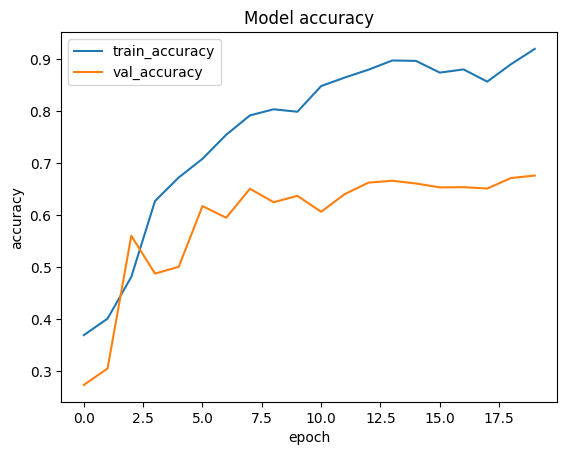

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [27]:
vit.load_weights('best_model.keras')

In [28]:
validation_dataset = validation_dataset.unbatch().batch(16)
vit.evaluate(validation_dataset)

143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.6890 - loss: 5.4599 - top_K_accuracy: 0.8830


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


[5.636735916137695, 0.6760315895080566, 0.871817409992218]

In [29]:
predicted = []
labels = []
for im, label in validation_dataset:
  predicted.append(vit.predict(im))
  labels.append(label.numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━

In [30]:
print(predicted[0].shape)
print(labels[0].shape)

(16, 3)
(16, 3)


In [31]:
print(np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))


[2 2 2 ... 2 1 2]
[1 2 1 ... 1 1 2]


[[271 116 128]
 [ 74 760 172]
 [ 91 157 509]]


Text(0.5, 58.7222222222222, 'Predicted')

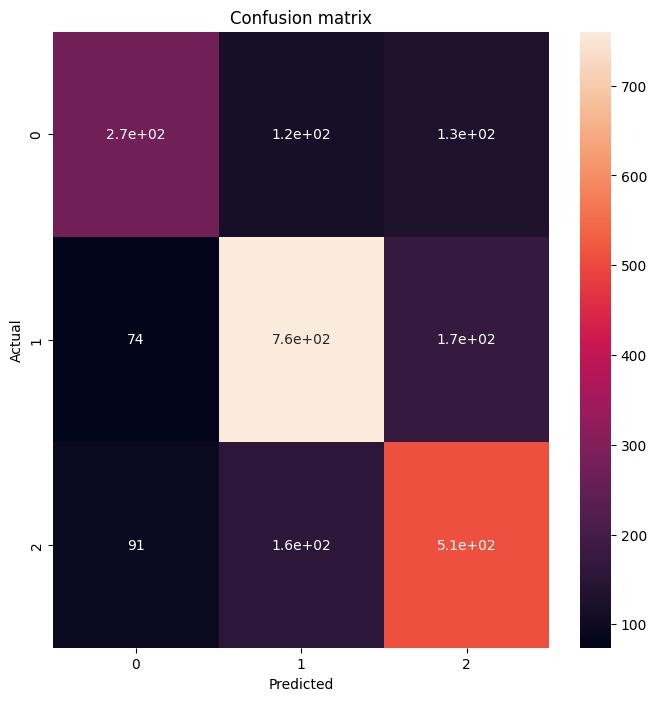

In [32]:
# as batch size for last is different, have to process it separately and concatenate
pred = np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])
lab = np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()])


cm = confusion_matrix(lab, pred)
print(cm)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

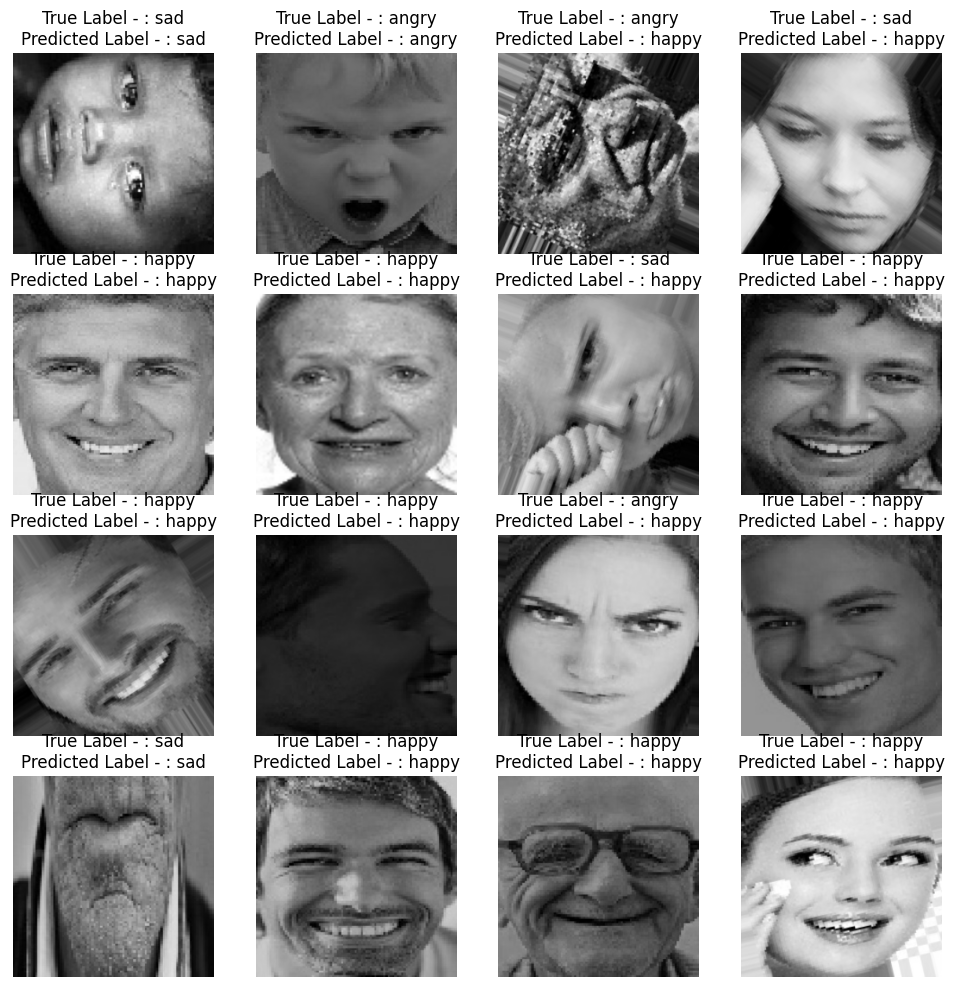

In [33]:
plt.figure(figsize = (12,12))

for images, labels in validation_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)

    plt.title("True Label - : " + CLASS_NAMES[tf.argmax(labels[i], axis = -1).numpy()]
              + "\n" + "Predicted Label - : "
              + CLASS_NAMES[int(tf.argmax(vit(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])] )
    plt.axis("off")